## Where does EU rubbish go? (2015-2021)

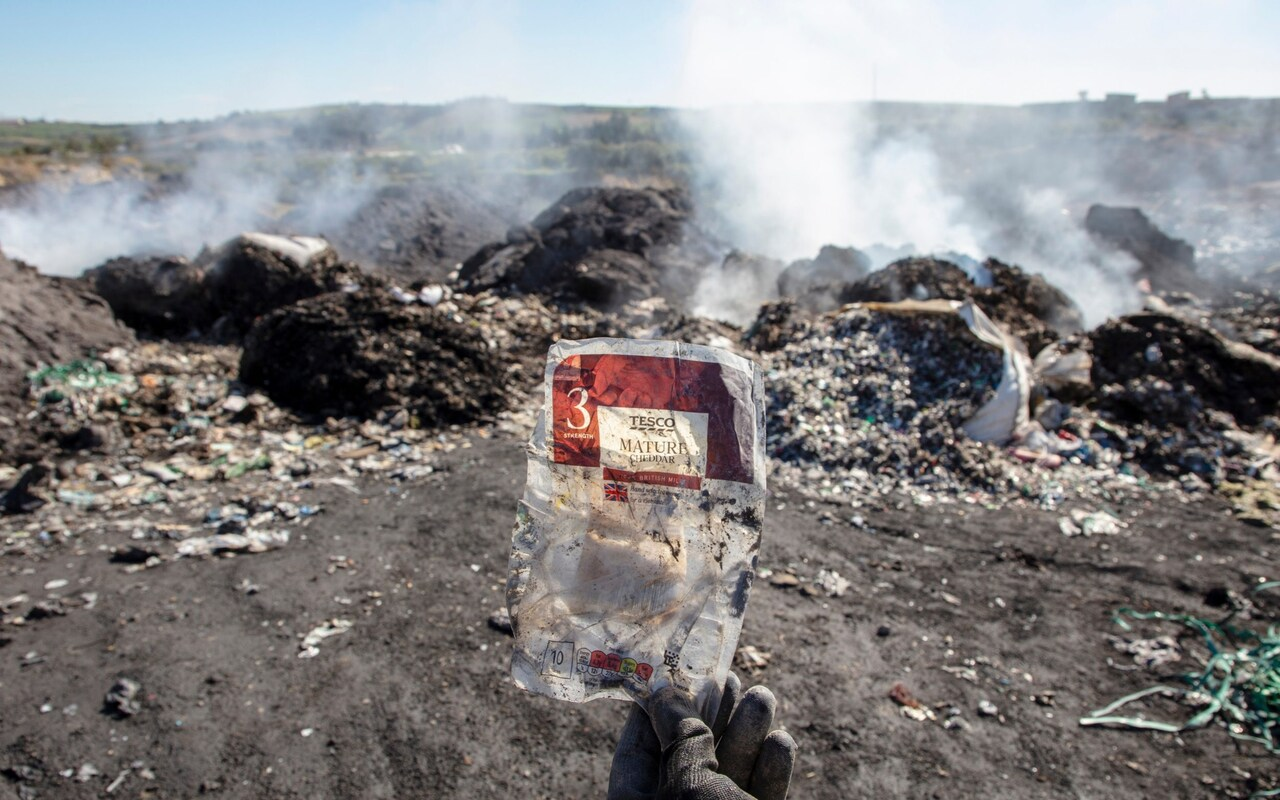
A garbage dump in southern Turkey, Adana. Photographic and video evidence show that plastic bags and packaging from the EU Member States and the UK are being dumped and burned illegally across southern Turkey. **Photo: [Greenpeace](https://www.greenpeace.org/international/press-release/47759/investigation-finds-plastic-from-the-uk-and-germany-illegally-dumped-in-turkey/)

In May 2022, Eurostat, the statistical office of the European Union, released the 2021 data about the exports of waste from the EU to non-EU countries. According to the news brief, exports of waste from the EU to non-EU countries reached 33.0 million tonnes, an increase of 77% since 2004, while imports of waste from non-EU countries increased by 11% since 2004, amounting to 19.7 million tonnes in 2021. we will visualize the data from [Eurostat's "Trade in waste by type of material and partner" database](https://ec.europa.eu/eurostat/databrowser/view/env_wastrdmp/default/table?lang=en) using Matplotlib, seaborn and raceplotly. Let's see if we can find some interesting insights on the main destinations of EU export of waste. 

Let's start with importing essential libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install raceplotly
from raceplotly.plots import barplot 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('env_wastrdmp__custom_3466635_page_linear.csv', encoding = 'Windows-1252') 
df

DATAFLOW       LAST UPDATE freq stk_flow rawmat partner  \
0     ESTAT:ENV_WASTRDMP(1.0)  24/05/2022 23:00    A      EXP  TOTAL      AD   
1     ESTAT:ENV_WASTRDMP(1.0)  24/05/2022 23:00    A      EXP  TOTAL      AD   
2     ESTAT:ENV_WASTRDMP(1.0)  24/05/2022 23:00    A      EXP  TOTAL      AD   
3     ESTAT:ENV_WASTRDMP(1.0)  24/05/2022 23:00    A      EXP  TOTAL      AD   
4     ESTAT:ENV_WASTRDMP(1.0)  24/05/2022 23:00    A      EXP  TOTAL      AD   
...                       ...               ...  ...      ...    ...     ...   
1255  ESTAT:ENV_WASTRDMP(1.0)  24/05/2022 23:00    A      EXP  TOTAL      ZW   
1256  ESTAT:ENV_WASTRDMP(1.0)  24/05/2022 23:00    A      EXP  TOTAL      ZW   
1257  ESTAT:ENV_WASTRDMP(1.0)  24/05/2022 23:00    A      EXP  TOTAL      ZW   
1258  ESTAT:ENV_WASTRDMP(1.0)  24/05/2022 23:00    A      EXP  TOTAL      ZW   
1259  ESTAT:ENV_WASTRDMP(1.0)  24/05/2022 23:00    A      EXP  TOTAL      ZW   

            geo  TIME_PERIOD  OBS_VALUE Country Name  
0     EU27_2020         2015        533      Andorra  
1     EU27_2020         2016        266      Andorra  
2     EU27_2020         2017       3620      Andorra  
3     EU27_2020         2018      10242      Andorra  
4     EU27_2020         2019      10379      Andorra  
...         ...          ...        ...          ...  
1255  EU27_2020         2017         19     Zimbabwe  
1256  EU27_2020         2018        448     Zimbabwe  
1257  EU27_2020         2019        126     Zimbabwe  
1258  EU27_2020         2020        100     Zimbabwe  
1259  EU27_2020         2021        507     Zimbabwe  

[1260 rows x 10 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATAFLOW      1260 non-null   object
 1   LAST UPDATE   1260 non-null   object
 2   freq          1260 non-null   object
 3   stk_flow      1260 non-null   object
 4   rawmat        1260 non-null   object
 5   partner       1253 non-null   object
 6   geo           1260 non-null   object
 7   TIME_PERIOD   1260 non-null   int64 
 8   OBS_VALUE     1260 non-null   int64 
 9   Country Name  1260 non-null   object
dtypes: int64(2), object(8)
memory usage: 98.6+ KB


## About the features

- [freq] - Time frequency: Annual [A]
- [stk_flow] - Stock or flow: Imports [IMP], Exports [EXP]
- [rawmat] - Raw materials: Total [TOTAL]
- [partner] - Geopolitical entity (partner): [ISO Code], merged with [Country Name] dataset using INDEX/MATCH functions
- [geo] - Geopolitical entity (reporting): European Union - 27 countries (from 2020) [EU27_2020]
- [TIME_PERIOD] - Time: [2015 to 2021]
- [OBS_VALUE] - Traded waste: Unit of measure is [Tonne]

## Data Visualization

In [4]:

fig=px.choropleth(df.sort_values("TIME_PERIOD"),
                 locations = "Country Name",
                 color = "OBS_VALUE",
                 locationmode = "country names", 
                  color_continuous_scale=[(0, "gray"), (0.1, "yellow"), (1, "purple")],
                 animation_frame = "TIME_PERIOD")
fig.update_layout(title = "Main destinations for EU’s waste exports")
fig.show()

Gif:

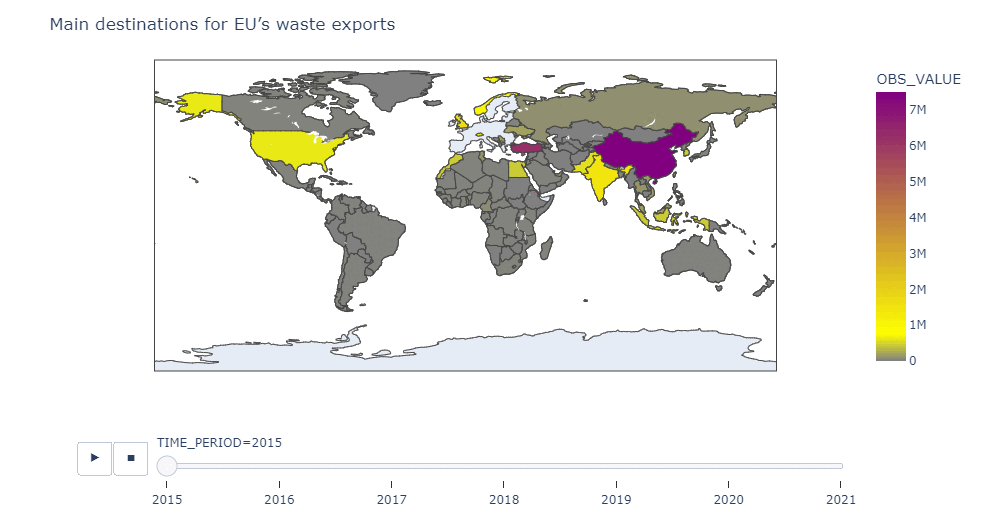

In [5]:
df1=df.drop(['DATAFLOW','LAST UPDATE', 'freq', 'stk_flow', 'rawmat', 'partner', 'geo'],axis=1)
df1

TIME_PERIOD  OBS_VALUE Country Name
0            2015        533      Andorra
1            2016        266      Andorra
2            2017       3620      Andorra
3            2018      10242      Andorra
4            2019      10379      Andorra
...           ...        ...          ...
1255         2017         19     Zimbabwe
1256         2018        448     Zimbabwe
1257         2019        126     Zimbabwe
1258         2020        100     Zimbabwe
1259         2021        507     Zimbabwe

[1260 rows x 3 columns]

In [6]:
df2 = df1.sort_values(['TIME_PERIOD','OBS_VALUE'],ascending=False).groupby('TIME_PERIOD').head(10)
df2


TIME_PERIOD  OBS_VALUE    Country Name
1111         2021   14647662          Turkey
494          2021    2377265           India
342          2021    1868716           Egypt
235          2021    1742527     Switzerland
1154         2021    1529580  United Kingdom
...           ...        ...             ...
820          2015    1033933          Norway
1158         2015     620797   United States
883          2015     565162        Pakistan
336          2015     442461           Egypt
663          2015     437117         Morocco

[70 rows x 3 columns]

checking if any column has null values in them

In [7]:
df2.isnull().sum()

TIME_PERIOD     0
OBS_VALUE       0
Country Name    0
dtype: int64

In [8]:
(df2.astype(str) == 'nan').any()

TIME_PERIOD     False
OBS_VALUE       False
Country Name    False
dtype: bool

*Not a single missing value!

## What are the main destinations of EU export of waste in 2021? 

In [9]:
df2.head(10)

TIME_PERIOD  OBS_VALUE    Country Name
1111         2021   14647662          Turkey
494          2021    2377265           India
342          2021    1868716           Egypt
235          2021    1742527     Switzerland
1154         2021    1529580  United Kingdom
826          2021    1401504          Norway
889          2021    1294207        Pakistan
480          2021    1093984       Indonesia
1164         2021     878990   United States
669          2021     598430         Morocco

In 2021, the amount of waste exported from EU member states to Turkey reached 14.7 million tons. According to the Eurostat's data, India is in the second place after Turkey with 2.4 million tons and Egypt is in the third place with 1.9 million tons. Other countries in the ranking were Switzerland, the UK, Norway, Pakistan, Indonesia, the United States and Morocco, respectively.

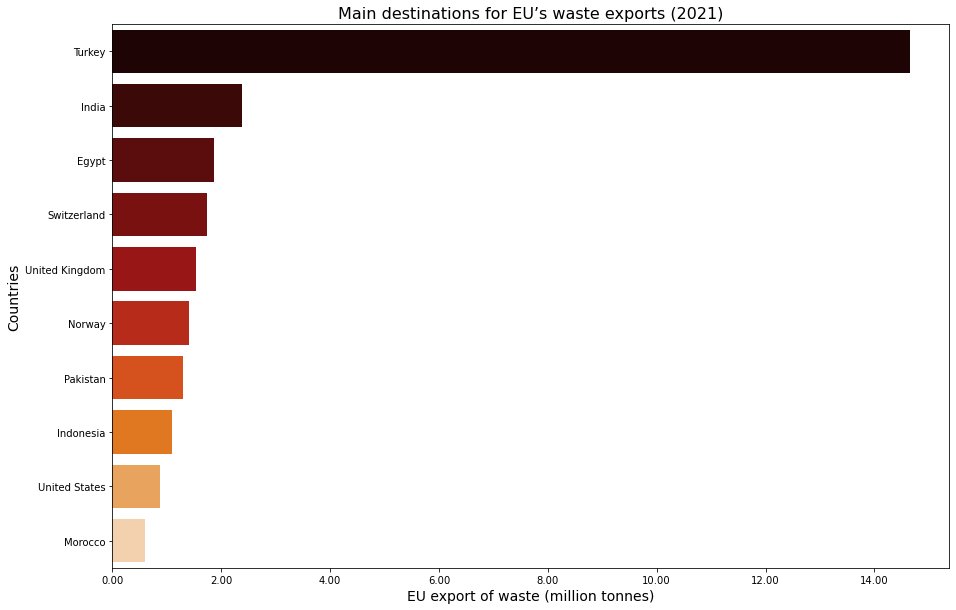

In [10]:
plt.figure(figsize=(15,10))
ax = sns.barplot(y="Country Name", x="OBS_VALUE", data=df2.head(10), palette="gist_heat", orient='h')
plt.xlabel('EU export of waste (million tonnes)', fontsize=14)
plt.ylabel('Countries', fontsize=14)
plt.title('Main destinations for EU’s waste exports (2021)', loc='Center', fontsize=16)
xlabels = ['{:,.2f}'.format(x) for x in ax.get_xticks()/1000000]
ax.set_xticklabels(xlabels)
plt.show();

As we can see from the plot above, EU member states send almost half of total waste of 33 million tons to Turkey. Here Racing bar chart! Let's take a look at the change in the last 7 years for deeper insights.

In [11]:
df3 = df2.reset_index().drop(['index'],axis=1)
df3

TIME_PERIOD  OBS_VALUE    Country Name
0          2021   14647662          Turkey
1          2021    2377265           India
2          2021    1868716           Egypt
3          2021    1742527     Switzerland
4          2021    1529580  United Kingdom
..          ...        ...             ...
65         2015    1033933          Norway
66         2015     620797   United States
67         2015     565162        Pakistan
68         2015     442461           Egypt
69         2015     437117         Morocco

[70 rows x 3 columns]

In [12]:
my_raceplot = barplot(df3,  item_column='Country Name', value_column='OBS_VALUE', time_column='TIME_PERIOD')
my_raceplot.plot(item_label = 'Countries', value_label = 'Main destinations for EU’s waste exports (2015-2021) (tonnes)', frame_duration = 600)

Gif:

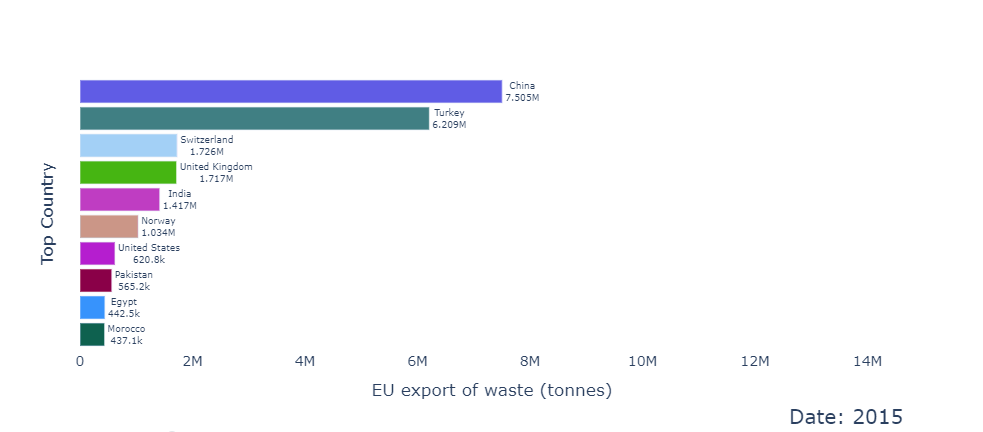

In addition to the astronomical increase in waste exported to Turkey, the rate of waste exported from the EU to Egypt and Pakistan has increased significantly in recent years. The amount of waste exported to Pakistan, which was only 0.6 million tons in 2015, increased to 1.3 million tons in 2021. On the other hand, the amount of waste sent to China, which peaked at 7.5 million tons in 2015, dropped significantly this year and left our plot.

Since the ban imposed by the PRC government on waste imports in 2018, Turkey has become one of the EU's target countries to export waste due to its geographical proximity to the European Union, strong commercial relations with the EU and lack of transparency and environment pollution control mechanism in the EU candidate country [See. Commission's Key findings of the 2021 Report on Turkey](https://ec.europa.eu/commission/presscorner/detail/en/qanda_21_5282). However, it's important to note that Turkey's recycling capacity is sufficient to [recycle only about 1%](https://www.forbes.com/sites/niallmccarthy/2016/03/04/the-countries-winning-the-recycling-race-infographic/?sh=73a95ddf2b3d) of its own waste, despite the increasing waste imports for years. And the fate of these rubbish is unknown due to the non-transparent environmental governance in Turkey. The public has the right to know where their waste goes, where and how it is disposed of.

While performing this beginner friendly EDA, I encoded and visualized up-to-date data from Eurostat. Looking forward for your feedback. Thanks a lot. 

## For a green and peaceful future: Made in Europe

Have a great day.

Abdullah Sencer Gozubenli